 # PREDICTION USING  UNSUPERVISED MACHINE                      LEARNING   MODEL

# By-Varun Choubey

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)



# Task- Predict the optimum number of clusters that will be formed

## We have the famous 'iris dataset' and our task is to find out the number of clusters that can be formed with the help of K- means clustering.


## The algorithm follows a simple and easy way to group a given data set into a certain number of coherent subsets called as clusters. The idea is to find K centres, called as cluster centroids, one for each cluster, hence the name K-means clustering. It has the aim to divide 'n' observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

# Steps involved in K-means clustering-

### 1. Select the number 'k' to determine the clusters which needs to be form.

### 2.Select random K points or centroids

### 3.Each dataset point need to be assign with each of the k centroids, which ever will be the closest to them.

### 4.Calculate the euclidean distance between them .

### 5.Calculate the variance and place a new centroid of each cluster.

### 6.Reassign each data point again with the nearest centroids

### 7.If there is no change in any assignment of the datasets to another cluster, we say that our clustering is over.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Reading dataset

In [7]:
iris = pd.read_csv("C:/Users/91913/Downloads/Iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values



In [33]:
iris.info()
iris[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

In [36]:
iris_setosa.count()

Id               50
SepalLengthCm    50
SepalWidthCm     50
PetalLengthCm    50
PetalWidthCm     50
Species          50
dtype: int64

In [34]:
iris.shape

(150, 6)

In [35]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Scatter plot


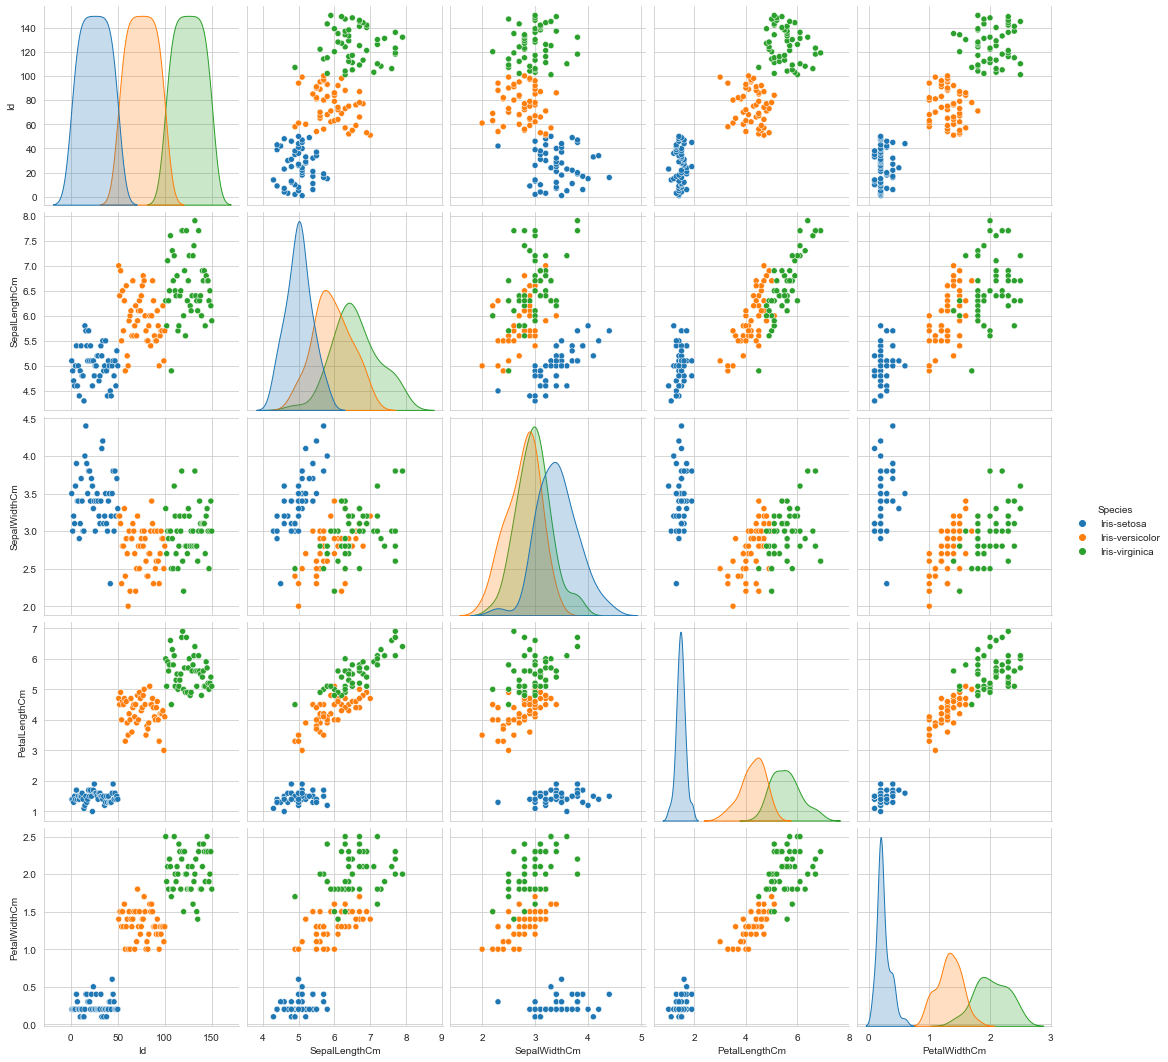

In [21]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",height=3);
plt.show()

## How do we know that what value we will choose for K?
**The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are some different ways to find the optimal number of clusters, but here we are discussing the most appropriate method to find the number of clusters or value of K.**

In [24]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
#initializing an empty list
wcss = []
#using for loop for identifying the clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering


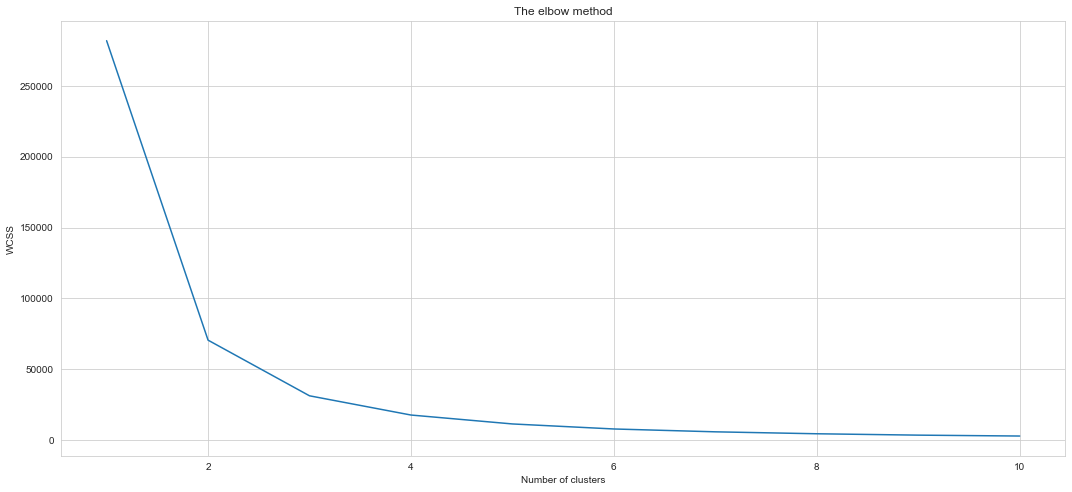

In [26]:
plt.figure(figsize=(18,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementing K-Means Clustering

### The Value of K that we can get from the graph will be 3.

In [27]:
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++',
                max_iter = 300,
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

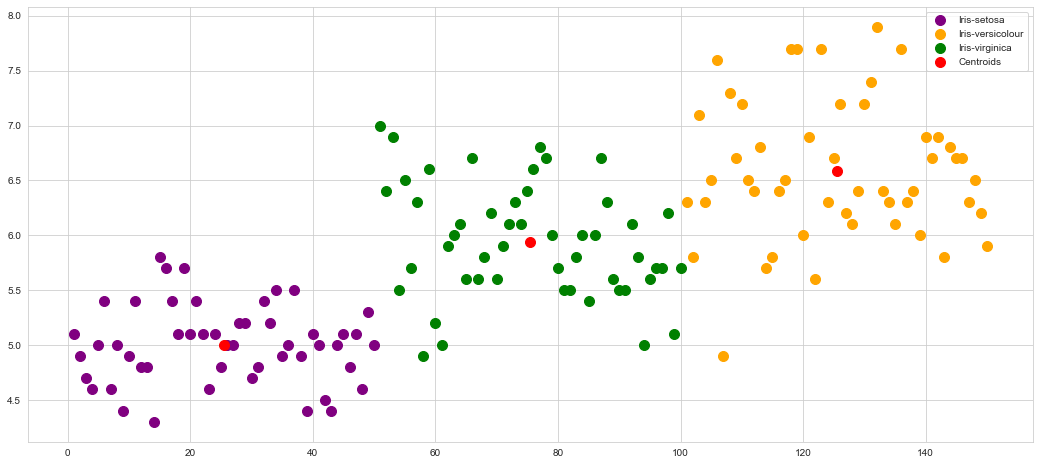

In [30]:
#Visualising the clusters
plt.figure(figsize=(18,8))
plt.scatter(x[y_kmeans == 0, 0],
            x[y_kmeans == 0, 1],
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],
            x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0],
            x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:,1],
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

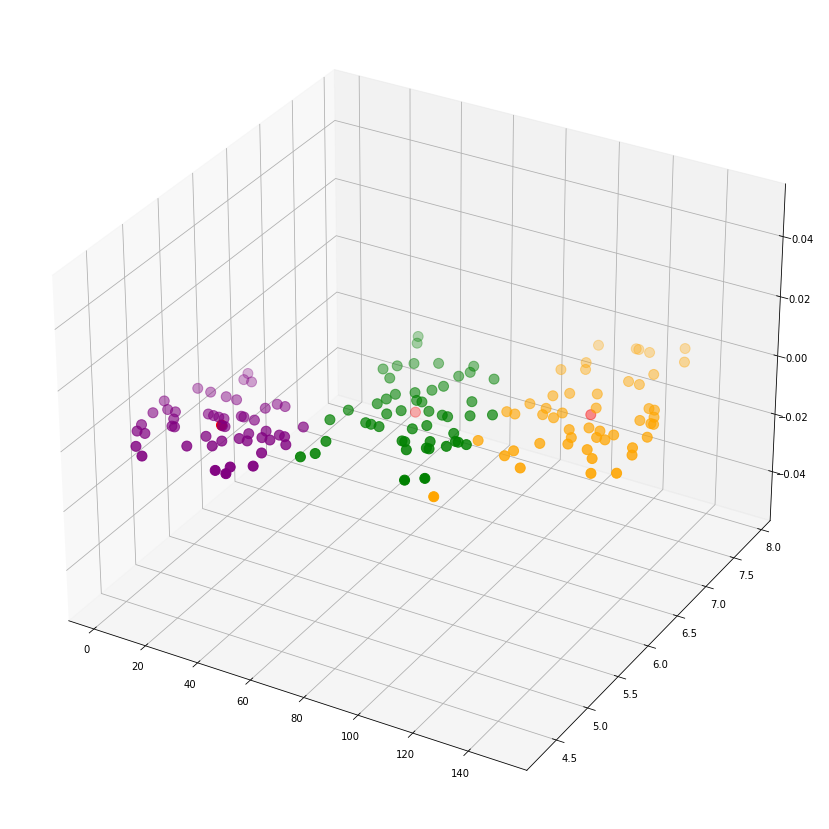

In [18]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], 
            x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],
            x[y_kmeans == 1, 1],
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], 
            x[y_kmeans == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:,1],
            s = 100, c = 'red', label = 'Centroids')
plt.show()